# Proyecto Final de Ciencia de Datos en Python

In [1]:
import numpy as np, seaborn as sns, matplotlib.pyplot as plt, pandas as pd

## cargamos la data
data_set = np.load('proyecto_data/proyecto_training_data.npy')

## definimos las columnas
columns   = ['SalePrice', 'OverallQual', '1stFlrSF', 'TotRmsAbvGrd', 'YearBuilt', 'LotFrontage']

## definimos el set de entrenamiento como un DataFrame, obteniendo el 80% del data set completo
training_set        = pd.DataFrame(data_set[: int(len(data_set) * 0.8)], columns = columns)
                    
## definimos el set de pruebas y validación como un DataFrame, obteniendo el 20% del data set completo
validation_test_set = pd.DataFrame(data_set[int(len(data_set) * 0.8):], columns = columns)

In [2]:
training_set.head()

,SalePrice,OverallQual,1stFlrSF,TotRmsAbvGrd,YearBuilt,LotFrontage
0,208500.0,7.0,856.0,8.0,2003.0,65.0
1,181500.0,6.0,1262.0,6.0,1976.0,80.0
2,223500.0,7.0,920.0,6.0,2001.0,68.0
3,140000.0,7.0,961.0,7.0,1915.0,60.0
4,250000.0,8.0,1145.0,9.0,2000.0,84.0


In [3]:
validation_test_set.head()

,SalePrice,OverallQual,1stFlrSF,TotRmsAbvGrd,YearBuilt,LotFrontage
0,235000.0,6.0,1236.0,7.0,1935.0,120.0
1,625000.0,10.0,1831.0,10.0,1995.0,118.0
2,171000.0,6.0,1118.0,6.0,1977.0,76.0
3,163000.0,6.0,1261.0,6.0,1958.0,76.0
4,171900.0,7.0,625.0,5.0,2006.0,35.0


In [4]:
len(training_set)

1168

In [5]:
len(validation_test_set)

292

## Análisis exploratorio de datos

In [8]:
## Obtener la media de los datos
media = np.nanmean(training_set, axis=0)
media

array([1.80590277e+05, 6.10102740e+00, 1.15632363e+03, 6.48544521e+00,
       1.97145120e+03, 6.99469854e+01])

In [9]:
## Obtener el valor máximo de los datos
max_data = np.nanmax(training_set, axis = 0)
max_data

array([7.550e+05, 1.000e+01, 3.228e+03, 1.400e+01, 2.010e+03, 3.130e+02])

In [10]:
## obtener el valor mínimo de los datos
min_data = np.nanmin(training_set, axis = 0)
min_data

array([3.490e+04, 1.000e+00, 3.340e+02, 2.000e+00, 1.875e+03, 2.100e+01])

In [11]:
## Obtener el rango (peak to peak) de los datos
peak_to_peak = max_data - min_data
peak_to_peak

array([7.201e+05, 9.000e+00, 2.894e+03, 1.200e+01, 1.350e+02, 2.920e+02])

In [12]:
## Obtener la desviacion estandar de los datos
std_data = np.nanstd(training_set, axis = 0)
std_data

array([7.87819511e+04, 1.37743519e+00, 3.73620332e+02, 1.60845172e+00,
       2.99388821e+01, 2.34659548e+01])

## Histograma para cada variable (seaborn)

In [15]:
## utilización de seaborn

def draw_hist(data):
    """Draw for each variable of the set 
    its respective histogram through seaborn"""
    
    fig, axes = plt.subplots(figsize=(25,25),nrows=3,ncols=2)
    sns.set_theme()
    for i in range(data.shape[1]):
        sns.distplot(data.iloc[:,i], kde=False, bins=15, ax=axes[i//2,i%2])
        sns.set_context("talk")
    plt.show()

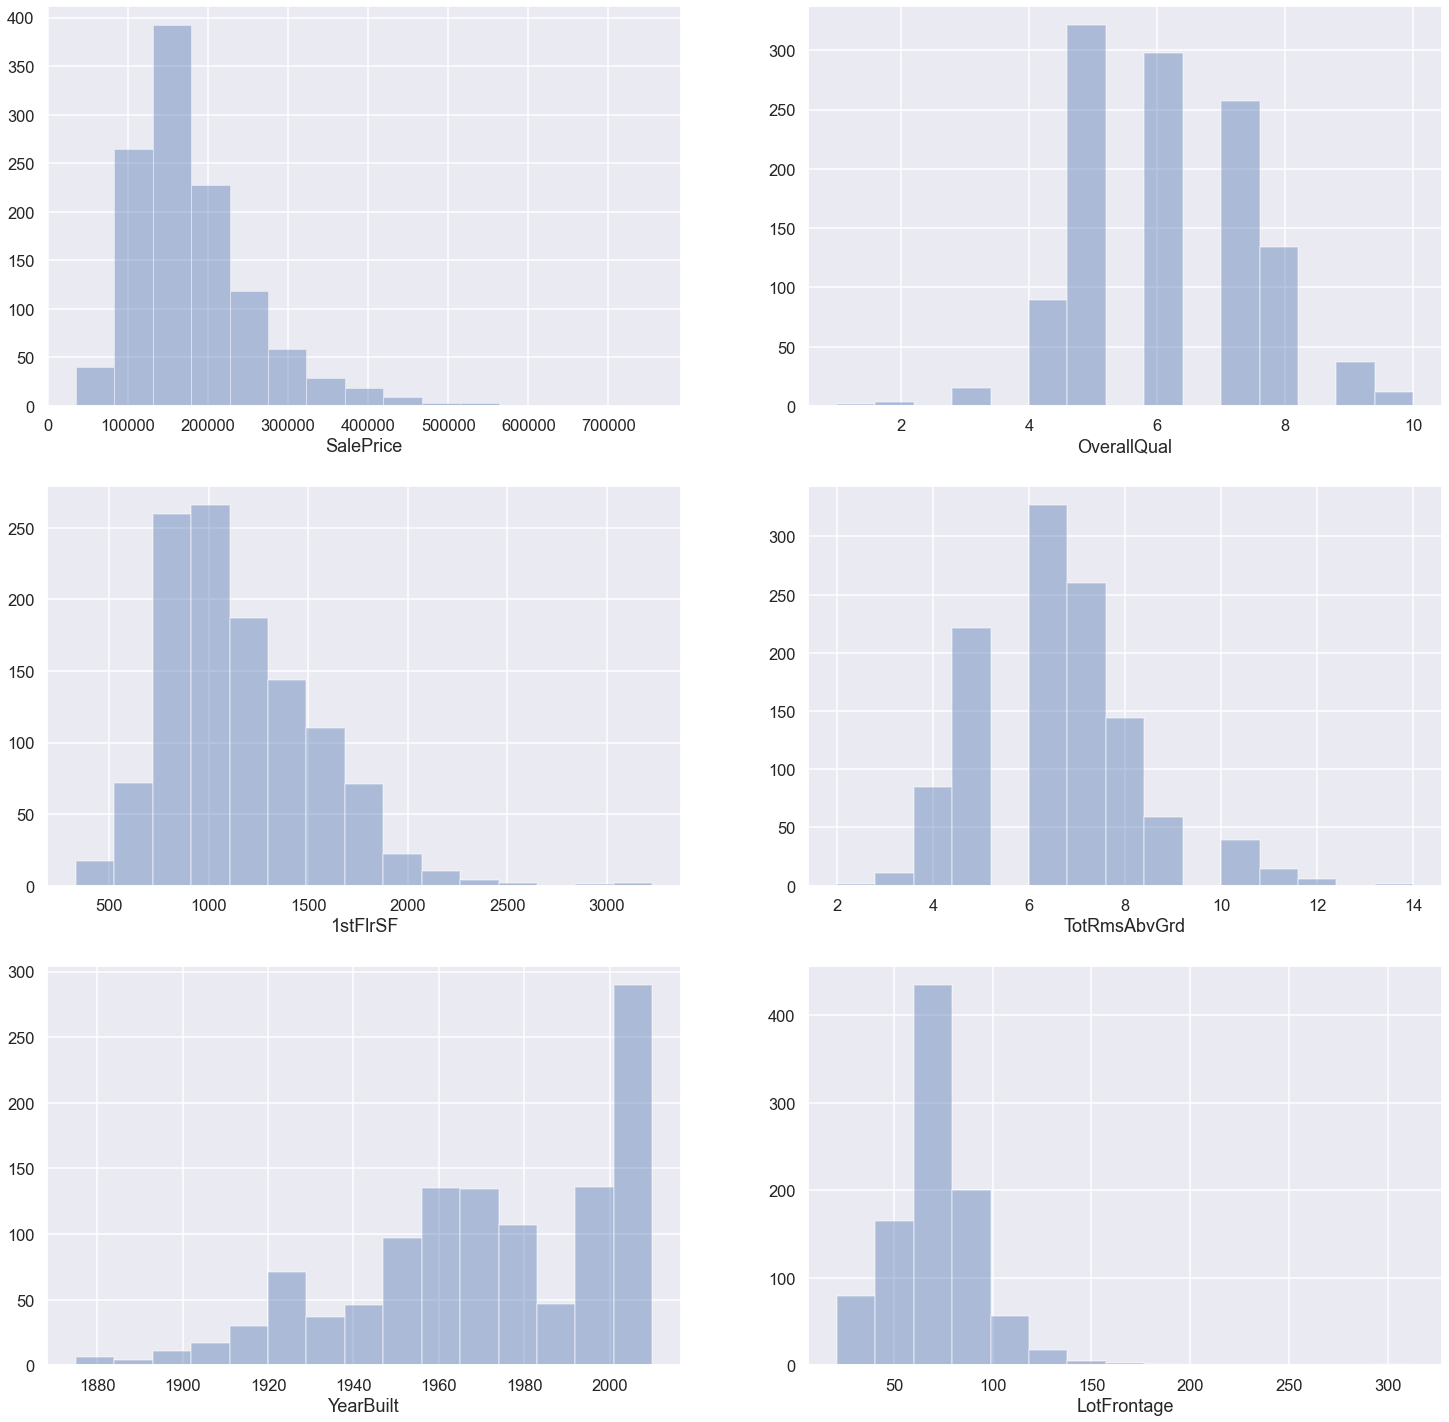

In [17]:
draw_hist(training_set)

## Coeficiente de correlación y gráfica de Dispersión

In [24]:
def get_corr_data(data):
    """Calculate for each independent variable X and Y (SalePrice), 
    the correlation coefficient."""
    return data.corr()

In [25]:
corr = get_corr_data(training_set)
corr.loc[:,'SalePrice']

SalePrice       1.000000
OverallQual     0.793990
1stFlrSF        0.616289
TotRmsAbvGrd    0.564707
YearBuilt       0.534171
LotFrontage     0.363292
Name: SalePrice, dtype: float64

In [27]:
def draw_scatter(data):
    """Plot for each independent variable X and Y (SalePrice), 
    the scatter plot."""
    
    color_arr = np.random.rand(len(data))
    fig, axes = plt.subplots(figsize=(25,25), nrows=3, ncols=2)

    for i in range(data.shape[1] - 1):
        axes[i//2,i%2].scatter(data.iloc[:,i+1], data.iloc[:,0], alpha=0.7, c = color_arr)
        axes[i//2,i%2].set_title(f"Coeficiente de correlación: {corr.loc[:,'SalePrice'][i+1]}")
        axes[i//2,i%2].set_xlabel(data.iloc[:,i+1].name)
        axes[i//2,i%2].set_ylabel(data.iloc[:,0].name)
    plt.tight_layout()
    plt.show()

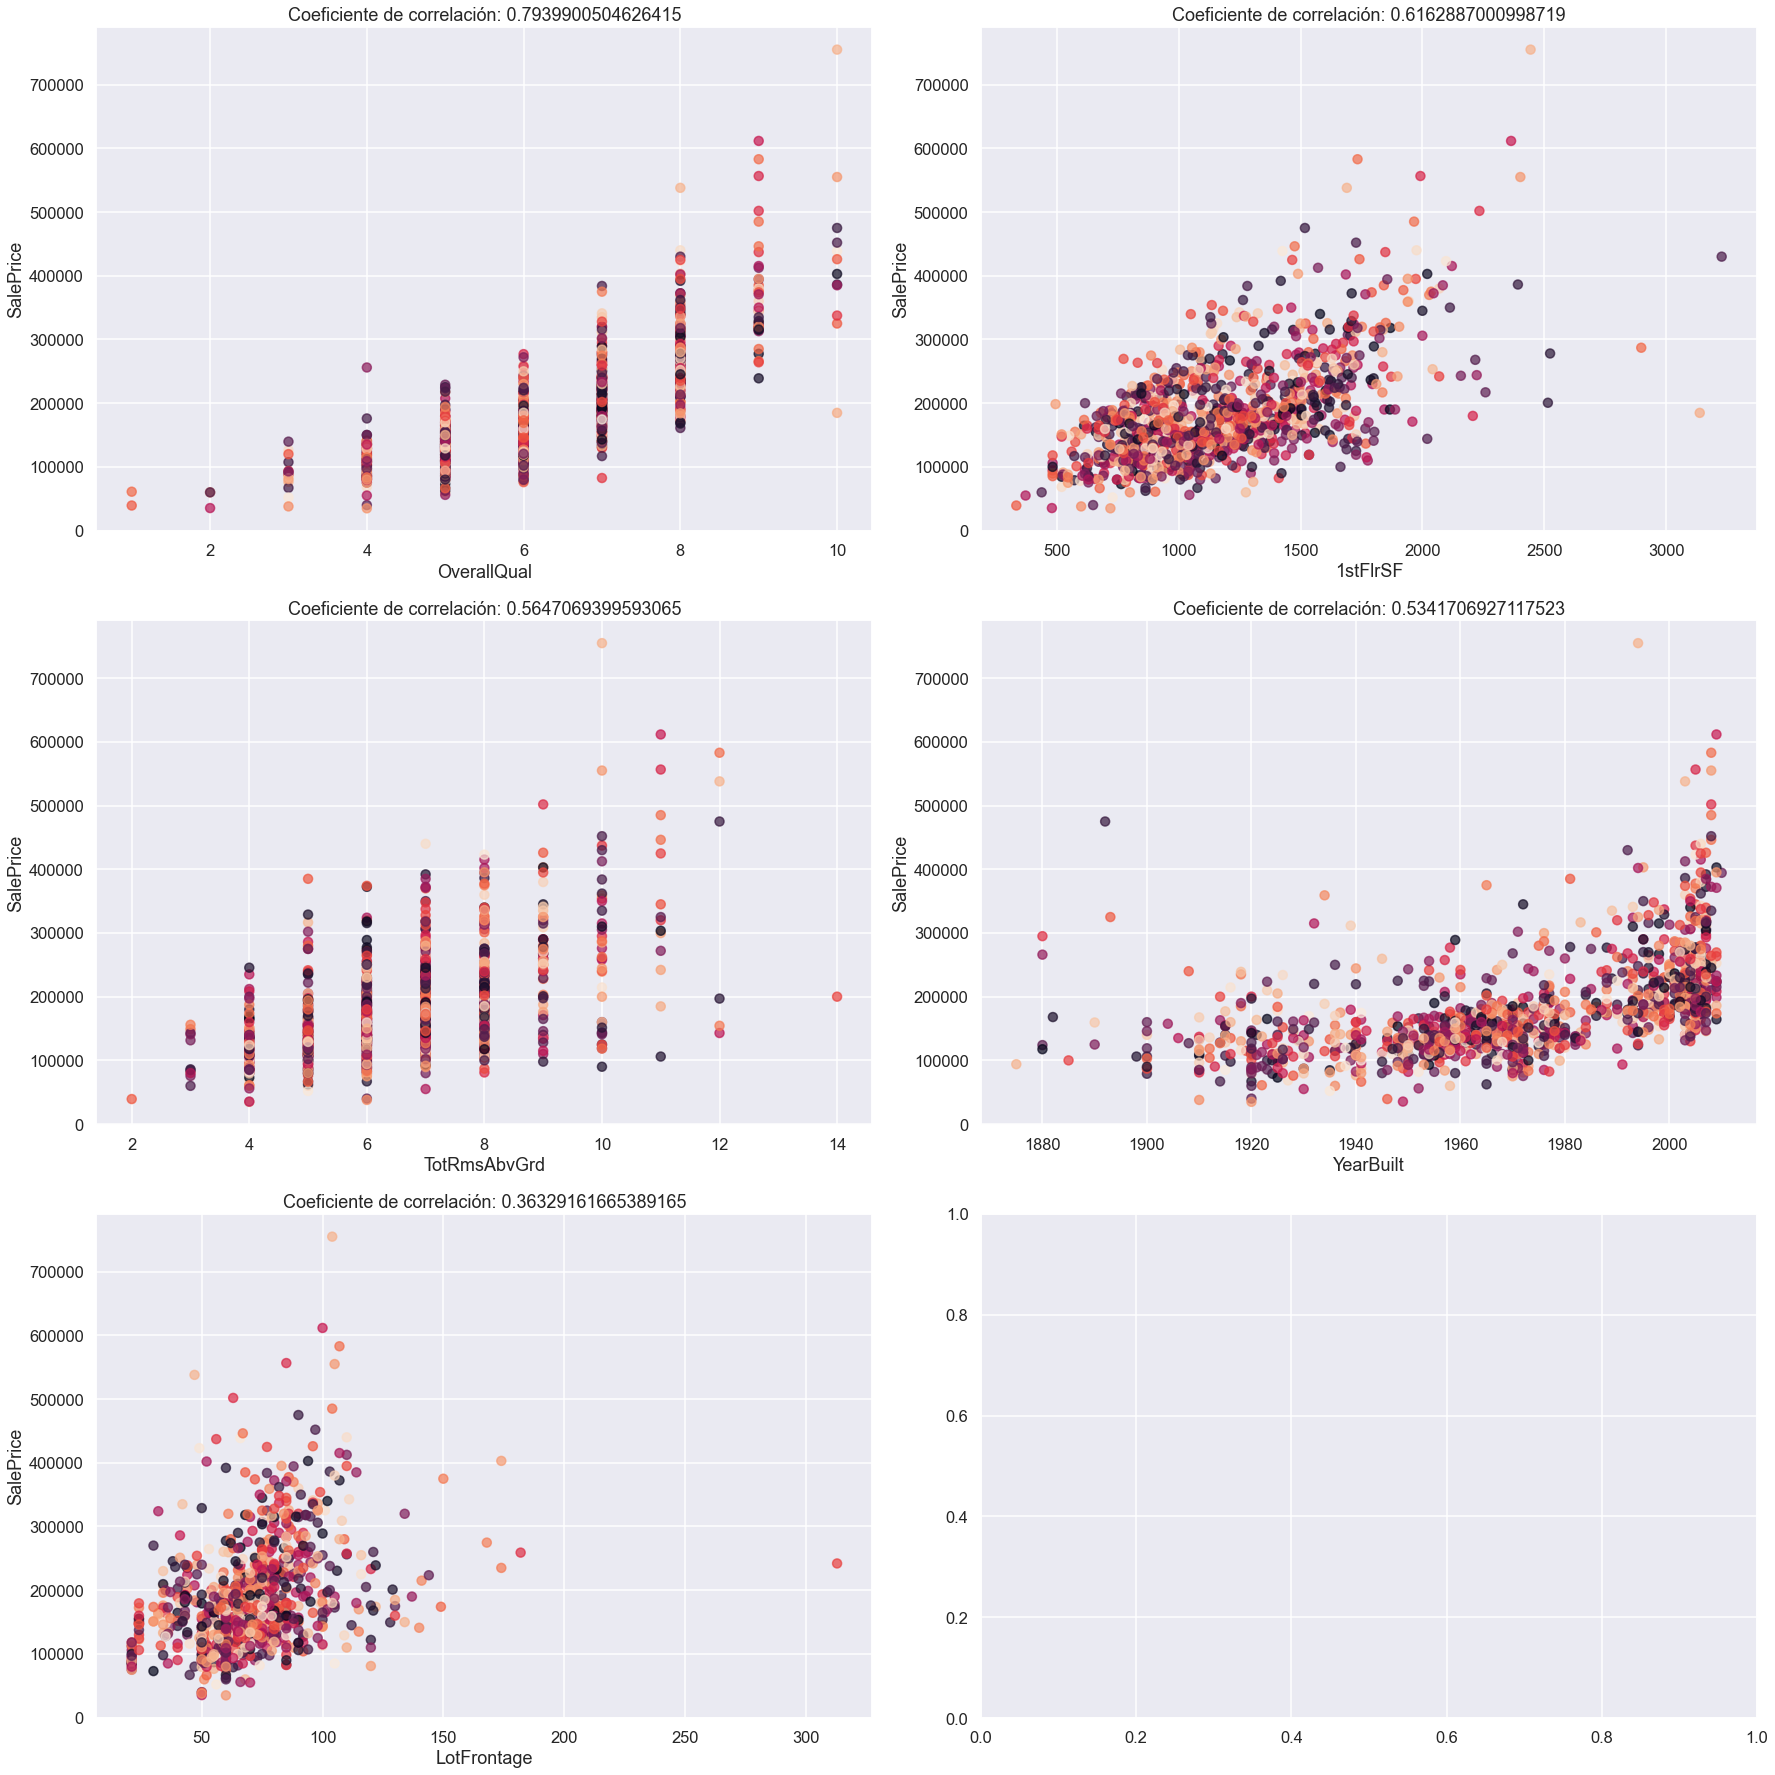

In [28]:
draw_scatter(training_set)